In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('customer-churn.csv')

In [3]:
dt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 01: Basic EDA ##

1. What are the columns and datatypes of each column ? 

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

2. What is distribution? 

In [5]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


__Observation:__
1. Maximium monthly charges is almost double of the mean. 
2. Minimum tenure is 0. (Which doesn't make sense)

In [6]:
dt.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,9821-BESNZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


__Observation:__
1. For some weird reason total charges is object type (maybe include na)
2. Most of the categorical fields have 2-3 unique values. 

3.Which columns have missing/incorrect values? 

In [7]:
dt.columns[dt.isnull().any()]

Index([], dtype='object')

Removing empty space with NA.

In [8]:
dt['TotalCharges'] = dt['TotalCharges'].apply(lambda x: np.nan if x==' ' else x)

In [9]:
dt.columns[dt.isnull().any()]

Index(['TotalCharges'], dtype='object')

__Observation:__
1. Maximium monthly charges is almost double of the mean (looks bit odd)
2. Minimum tenure is 0. (Which doesn't make sense)
3. Total charges contain 11 missing values
4. Looks like Categorical variables have more approriate value based on the unique values in each field. 

4. What is the class distribution?

In [10]:
(dt['Churn'].value_counts()/len(dt))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## What are the assumptions to begin with? 

1. As the tenure increases client will be less likely to switch to other network because the longer tenure shows his/her statisfaction?
2. Senior Citizens are less likely to switch but they may have a strong association with necessary service? After all most of the citizen spend their time watching time. They won't probably care about DSL or anything else. 
3. High Monthly charges can likely trigger churn. Maybe some other provider is cheaper than it. 
4. Monthly contract might trigger churn. longer contract often leave no choice. 
5. Internet Service and Phone service are primary they can impact churn than other services. 
6. Payment type can have any impact on churn.
7. Maybe service from partner is not as good. 
8. Having multiple lines can shrink down the chances of churn but may increase the charges. 
9. Maybe people churn because of bad tech support 


# Univariate and Bivariate Analysis

## Tenure:

1. What is distribution of it? 

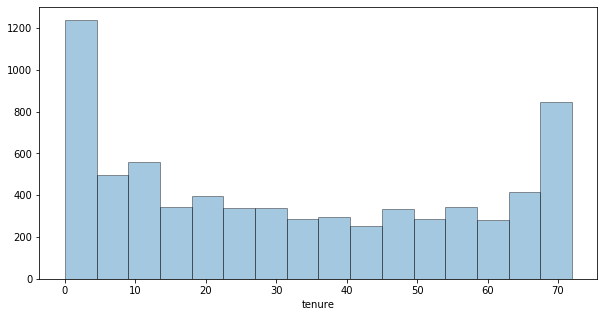

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(dt['tenure'],kde=False, hist_kws={'edgecolor':'Black'})

In [12]:
dt['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

__Observations:__
1. Unexpect spikes at the beginin.and end of the distribution suggest either most of the clients are new or very old.

2. What is Cumulative distribution of it?

In [13]:
tenure = dt['tenure'].sort_values()

In [14]:
p = 1. * np.arange(len(tenure)) / (len(tenure) - 1)

Text(0.5, 0, 'tenure')

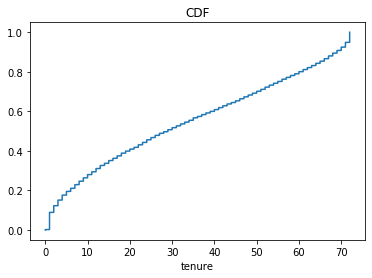

In [15]:
plt.plot(tenure,p)
plt.title('CDF')
plt.xlabel('tenure')

3. Tenure Vs Churn. 

In [16]:
agg = dt.groupby(by=['tenure','Churn'])['customerID'].count().reset_index().rename(columns={'customerID':'count'})

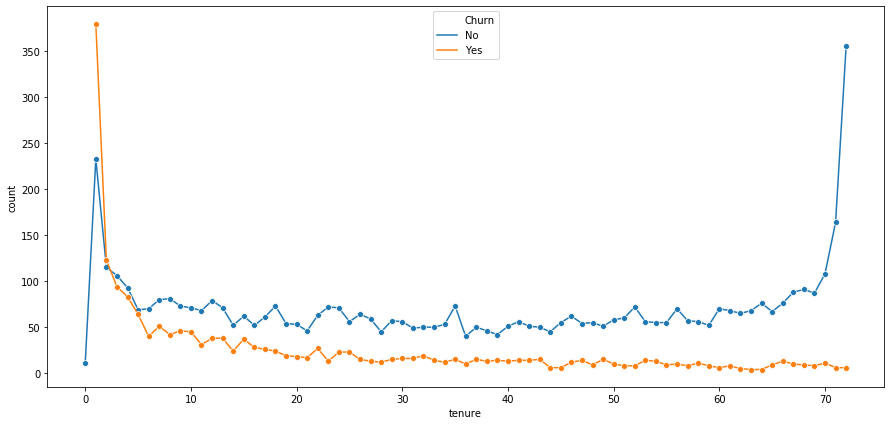

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x='tenure',y='count',hue='Churn',marker='o',data=agg)

__Observation:__
1. As suspected clients usually churn in the start of the tenure as they tenure increases churning often decline sharply. 
2. As of now we can say that if some is old customer they probably won't churn. 

## Senior Citizens

1. What is their distributions?

In [18]:
(dt['SeniorCitizen'].value_counts()/len(dt))*100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

2. What is the average churn rate between senior and non-senior citizens? 

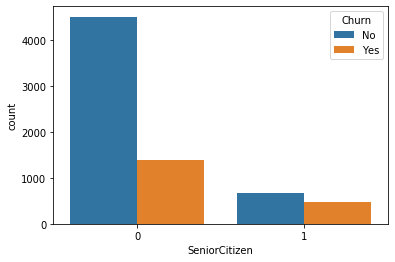

In [19]:
sns.countplot(dt['SeniorCitizen'],hue=dt['Churn'])

In [20]:
(dt.groupby(by=['SeniorCitizen','Churn'])['customerID'].count()/len(dt))*100

SeniorCitizen  Churn
0              No       64.006815
               Yes      19.778503
1              No        9.456198
               Yes       6.758484
Name: customerID, dtype: float64

__Observation__:
1. Our assumption was wrong about senior citizens. They do more churn right now the reason is unknown and the evidence is also not so significant. We have to revisit it from other angle (with combination of other features).
2. Only about 23% of non-seniors churn whereas this percentage is 70% in senior citizens

## Monthly charges

1. What is the distribution?

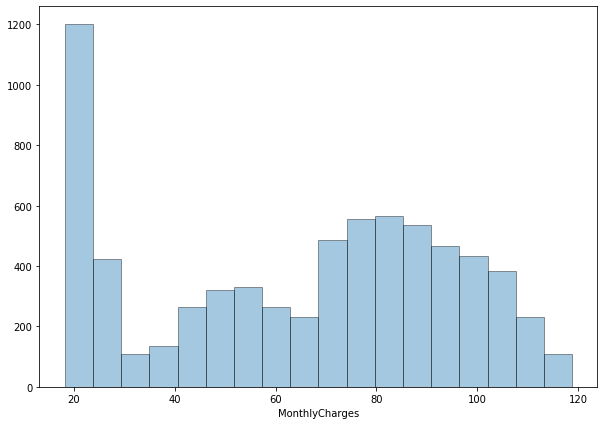

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(dt['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})

2. Distribution of churner and non-churners ?

In [22]:
churners = dt[dt['Churn']=='Yes']
non_churners = dt[dt['Churn']=='No']

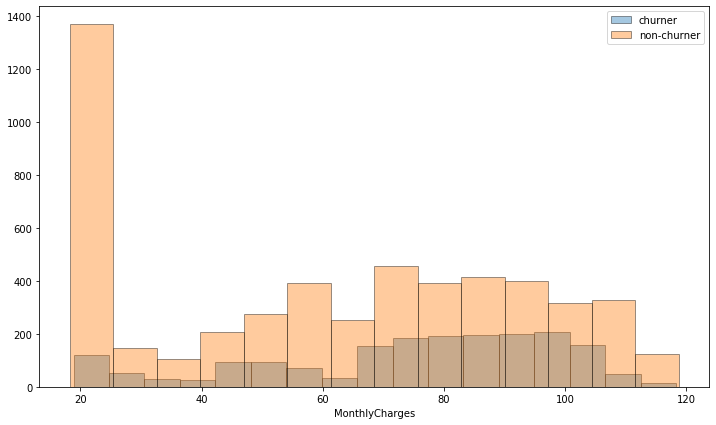

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(non_churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black'})
plt.legend(['churner','non-churner'])

Text(0.5, 1.0, 'Non-Churner Monthly charges')

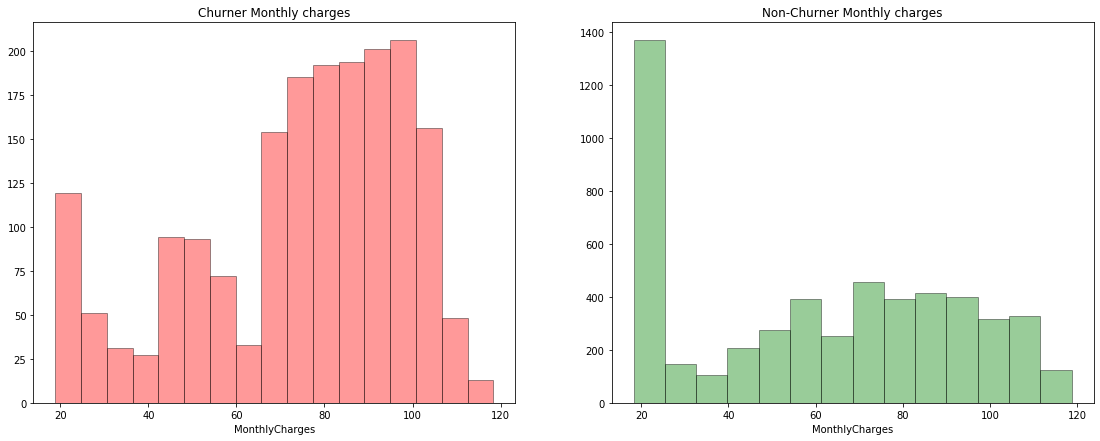

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(19,7))
sns.distplot(churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black','color':'red'}, ax=ax[0])
ax[0].set_title('Churner Monthly charges')
sns.distplot(non_churners['MonthlyCharges'], kde=False, hist_kws={'edgecolor':'black','color':'green'}, ax = ax[1])
ax[1].set_title('Non-Churner Monthly charges')

In [25]:
dt[['Churn','MonthlyCharges']].groupby(by=['Churn']).median()

,MonthlyCharges
Churn,
No,64.425
Yes,79.650


__Observation__:
1. High monthly chargers are one of the significant reason of churning. 
2. They assumption was right it is safe to say at the moment that in some cases (not all) in which monthly charges are high there is a high chance of churn.

## Contract type

1. What is the distribution? 

In [26]:
(dt['Contract'].value_counts()/len(dt))*100

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

2. What is distribution of churner and non-churner with in each contract type? 

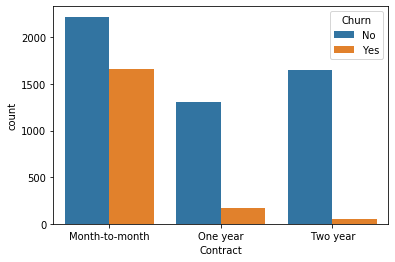

In [27]:
sns.countplot(dt['Contract'],hue=dt['Churn'])

__Observation:__
1. As suspect the longer contract often leave less space for churn. 

## Payment type

1. What is the distribution? 

In [28]:
(dt['PaymentMethod'].value_counts()/len(dt))*100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

2. What is distribution of churner and non-churner with in each payment type? 

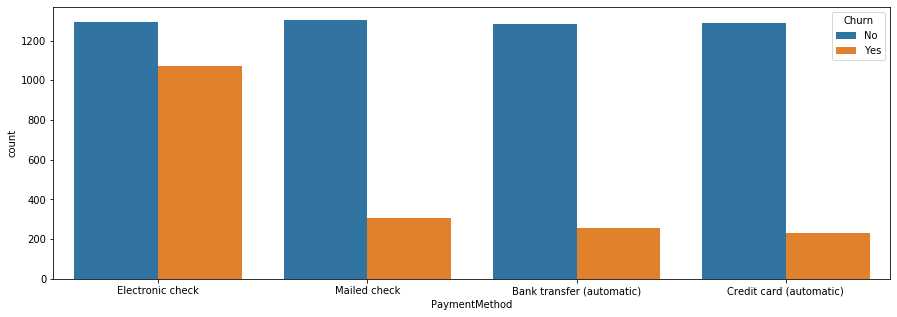

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(dt['PaymentMethod'],hue=dt['Churn'])

In [30]:
chuner = dt[dt['Churn']=='Yes']

In [31]:
agg = chuner.groupby(by=['PaymentMethod'])['customerID'].count().reset_index().rename(columns={'customerID':'count'})

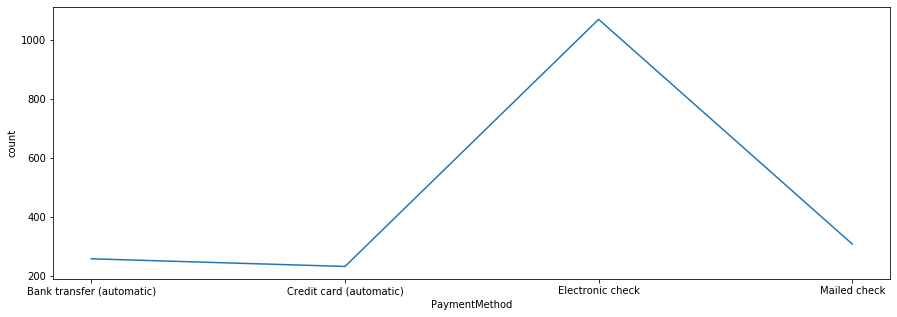

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='PaymentMethod',y='count',markers='o', data=agg)

__Observation__: 
1. Electronic check has weird number churn cases. More reasoning with other features is required to understand why it happened. 
2. Whereas, credit card has the lowest percentage of churner. 

## Phone Service

1. What is the distribution? 

In [33]:
(dt['PhoneService'].value_counts()/len(dt))*100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

2. What is percentage of churner in each group? 

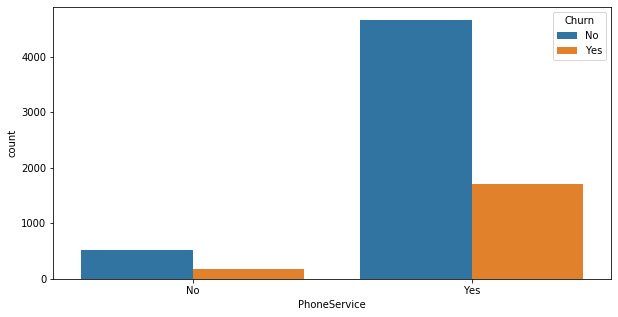

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dt['PhoneService'], hue=dt['Churn'])

__Observation__:
1. Can't conclude anything because 90% percent of people are using phone service so churn suppose to be high there as well. 

## Internet Service

1. What is the distribution?

In [35]:
(dt['InternetService'].value_counts()/len(dt))*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

2. What is the percentage of churner in each group? 

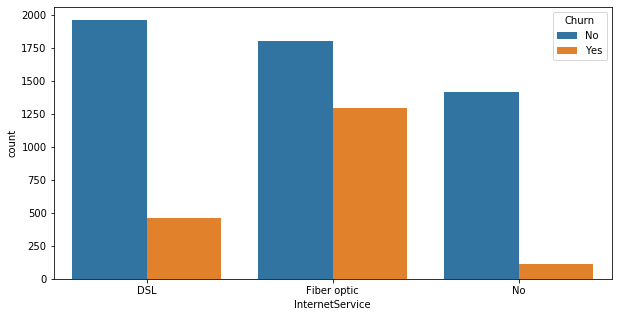

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dt['InternetService'], hue=dt['Churn'])

__Observation__:
1. Can't conclude at the moment. Maybe fiber optics users are charge higher and which may lead to churn. 

## Partner

1. What is the distribution? 

In [37]:
(dt['Partner'].value_counts()/len(dt))*100

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

2. Is there any significant difference of churn percentage between partner and company service? 

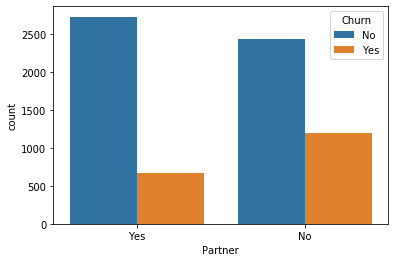

In [38]:
sns.countplot(dt['Partner'], hue=dt['Churn'])

In [39]:
round((dt[['Partner','Churn','customerID']].groupby(by=['Partner','Churn']).count()/len(dt))*100)

customerID
Partner Churn            
No      No           35.0
        Yes          17.0
Yes     No           39.0
        Yes           9.0

__Observations__:
1. Those who have taken service from partners they have less percentage of churn then those who have taken it from the company. It is werid though further investigation is required.
2. As assumption about the partner was wrong as it turned out less people are churning with partners. 

## Multiple line

1. What is the ratio?

In [40]:
round((dt['MultipleLines'].value_counts()/len(dt))*100)

No                  48.0
Yes                 42.0
No phone service    10.0
Name: MultipleLines, dtype: float64

2. What is the percentage of people who churn even if they have multiple lines with the company? 

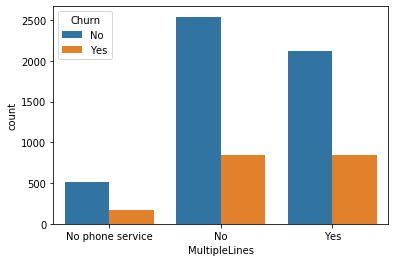

In [41]:
sns.countplot(dt['MultipleLines'], hue=dt['Churn'])

In [42]:
round((dt[['MultipleLines','Churn','customerID']].groupby(by=['MultipleLines','Churn']).count()/len(dt))*100)

customerID
MultipleLines    Churn            
No               No           36.0
                 Yes          12.0
No phone service No            7.0
                 Yes           2.0
Yes              No           30.0
                 Yes          12.0

__Observations__:
1. Our assumption was wrong as it shows no discrimination with churn. 

## Tech Support

1. What is the ratio?

In [43]:
round((dt['TechSupport'].value_counts()/len(dt))*100)

No                     49.0
Yes                    29.0
No internet service    22.0
Name: TechSupport, dtype: float64

2. What is the percentage of people who churn even if they have tech support with the company? 

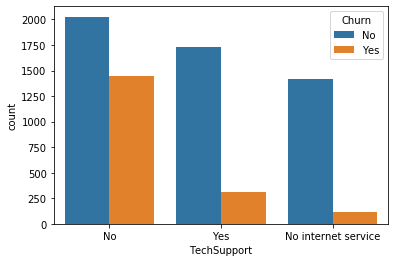

In [44]:
sns.countplot(dt['TechSupport'], hue=dt['Churn'])

__Observations__:
1. Our assumption was correct client churn more in cases where tech support was not provided as compared to cases where it was provided. 

# Multivariate Analysis

## Further Questions:

1. What if the old customer (longer tenure) got a high monthly charges? Will he/she churn? how likely is that? 
2. Does senior citizen churn because of high monthly charges? i.e they can't afford it.
3. What if senior citizen is an old customer will they still churn? 
4. Those who have internet service (fiber optics) will they churn because the service is so expensive? 
5. Those who are old customers (longer tenure) how likely is they receive a high amount bill? 

1. What will happen if the old customer (longer tenure) got a high monthly charges? Will he/she churn? how likely is that? 

In [45]:
agg = dt[['MonthlyCharges','tenure']].groupby(by=['tenure']).median().reset_index()

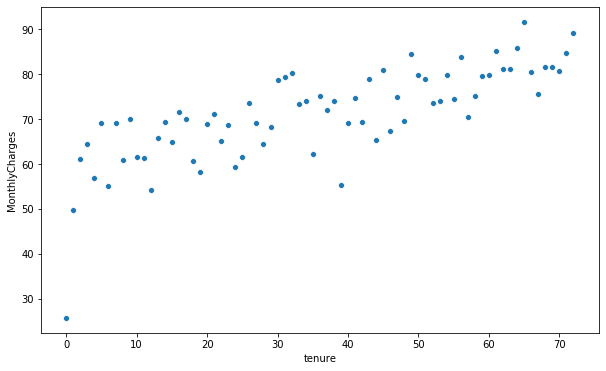

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='tenure',y='MonthlyCharges', data=agg)

__Comments__:
1. Seems like a linear relationship as the tenure increase the median charges also increases. 

In [47]:
agg = dt[['MonthlyCharges','tenure','Churn']].groupby(by=['Churn','tenure']).median().reset_index()

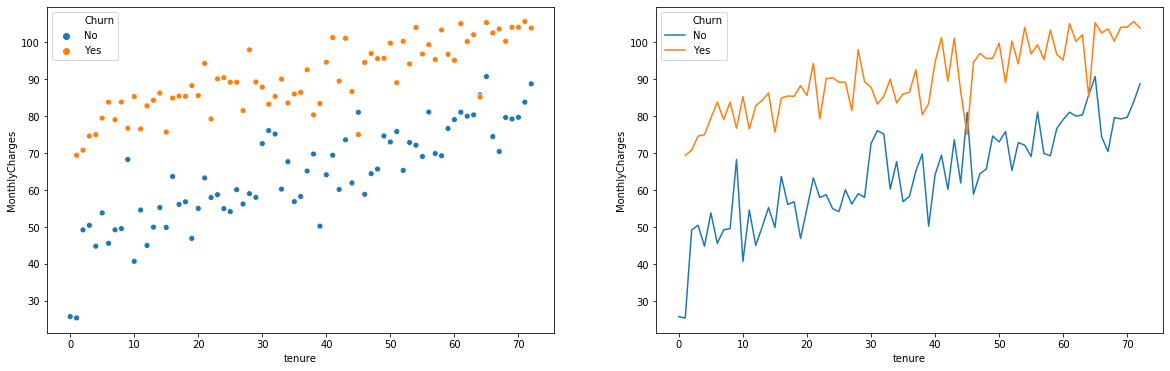

In [48]:
fig, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn', data=agg, ax=ax[0])
sns.lineplot(x='tenure',y='MonthlyCharges',hue='Churn', data=agg, ax=ax[1])

How likely is old customer churn when monthly charges are high? 

In [49]:
# create bucket # 
dt['tenure_buckets'] = pd.cut(dt['tenure'],[0,36,100],labels=['Customer','Old Customer'])
dt['monthly_charges_bucket'] = pd.cut(dt['MonthlyCharges'],[18,70,120],labels=['Normal','High'])

In [50]:
only_high = dt[(dt['monthly_charges_bucket']=='High') & (dt['tenure_buckets']=='Old Customer')]

In [51]:
round((only_high[['Churn','customerID']].groupby(by=['Churn']).count()/len(only_high))*100)

,customerID
Churn,
No,83.0
Yes,17.0


In [52]:
only_high = dt[(dt['monthly_charges_bucket']=='Normal') & (dt['tenure_buckets']=='Old Customer')]

In [53]:
round((only_high[['Churn','customerID']].groupby(by=['Churn']).count()/len(only_high))*100)

,customerID
Churn,
No,95.0
Yes,5.0


__Observations__:
- Its probably a linear relation between tenure and monthly charges. 
- People will churn when the monthly charges are high even if they are old customers. There are only few cases where they people churn if the monthly charges were normal. 
- Its look like monthly charges are the only reason old customer opt for churn. 
- If we take more than 70 as a threshold for high monthly charges then the percentage of churn in old customers jumps from 5% to 17%. 

2. Does senior citizen churn because of high monthly charges? i.e they can't afford it.

In [54]:
senior_citizens = dt[dt['SeniorCitizen']==1]

In [55]:
senior_citizens[['Churn','MonthlyCharges']].groupby(by=['Churn']).median()

,MonthlyCharges
Churn,
No,84.850
Yes,84.825


__Observations__:
1. Nope high monthly charges are not the reason of senior citizens to churn. Then what is their reason? 

3. What if senior citizen is an old customer will they still churn? 

In [56]:
senior_citizens[['Churn','tenure']].groupby(by=['Churn']).median()

,tenure
Churn,
No,45
Yes,15


__comments__:
1. median indicates that they won't churn if they are old customer.   

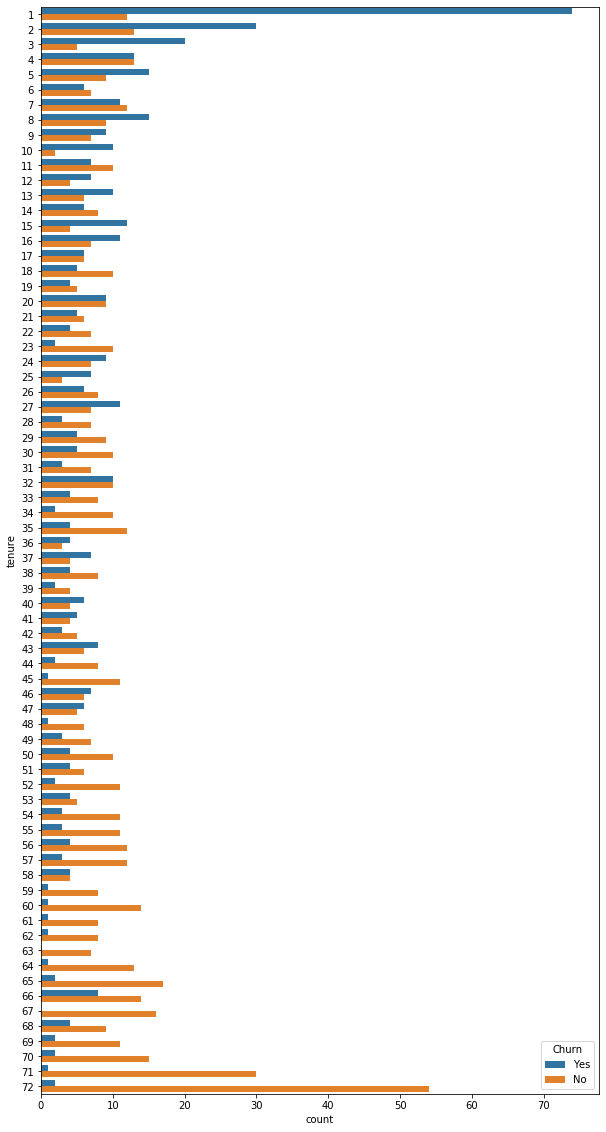

In [57]:
fig, ax = plt.subplots(figsize=(10,20))
sns.countplot(y=senior_citizens['tenure'],hue=senior_citizens['Churn'])

In [58]:
agg = senior_citizens[['tenure','Churn','customerID']].groupby(by=['tenure','Churn']).count().reset_index().rename(columns={'customerID':'counts'})

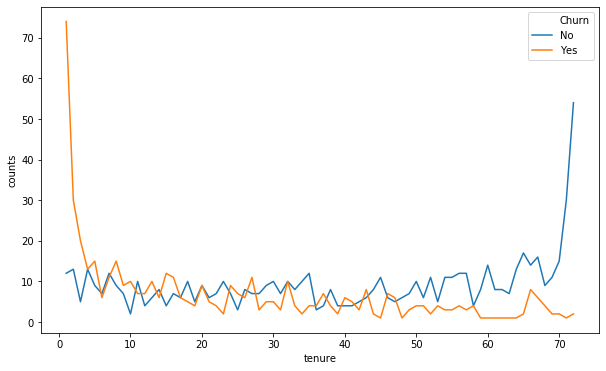

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(agg['tenure'],agg['counts'],hue=agg['Churn'],ci=False)

__Observations__:
1. Senior citizens often don't churn if they are old customers. 

4. Those who have internet service (fiber optics) will they churn because the service is so expensive? 
Is fiber optics expensive?

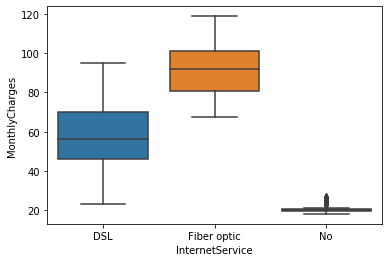

In [60]:
sns.boxplot(x=dt['InternetService'],y= dt['MonthlyCharges'])

__comments__:
1. Fiber optics is expensive.

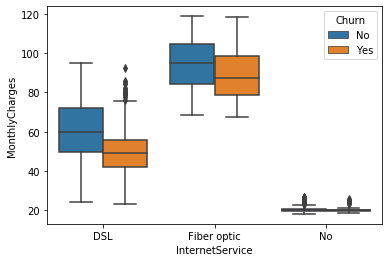

In [61]:
sns.boxplot(x=dt['InternetService'],y= dt['MonthlyCharges'],hue=dt['Churn'])

__Observations__:
1. Fiber Optics is expensive but those who are churning they have less monthly charges as compared to those who are not churning which indicate monthly charges aren't the reason behind churning based on fiber optics. Requires further investigation. 

5. Those who are old customers (longer tenure) how likely is they receive a high amount bill? (Only those who don't churn). 

In [62]:
not_churner = dt[dt['Churn']=='No']
churner = dt[dt['Churn']=='Yes']
agg = not_churner.groupby(by=['tenure'])['MonthlyCharges'].median().reset_index()

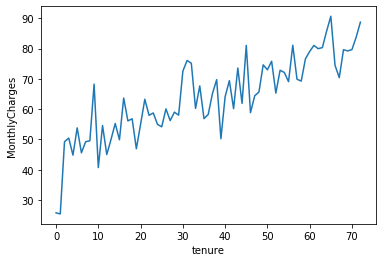

In [63]:
sns.lineplot(agg['tenure'],agg['MonthlyCharges'])

In [64]:
monthly_charges = non_churners['MonthlyCharges'].sort_values()
monthly_charges_churner = chuner['MonthlyCharges'].sort_values()

In [65]:
p = 1. * np.arange(len(monthly_charges)) / (len(non_churners) - 1)
p_churner = 1. * np.arange(len(monthly_charges_churner)) / (len(churner) - 1)

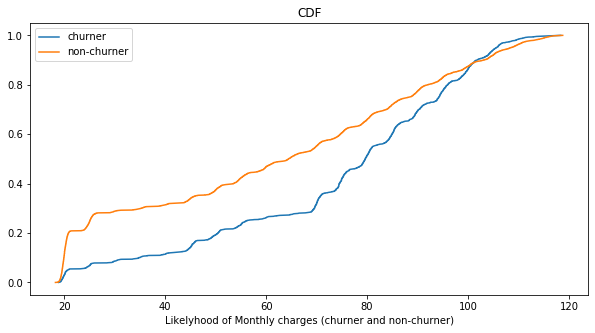

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(monthly_charges_churner,p_churner)
plt.plot(monthly_charges,p)
plt.title('CDF')
plt.xlabel('Likelyhood of Monthly charges (churner and non-churner)')
plt.legend(['churner','non-churner'])

__Obervations__:
1. It is very likely to have high monthly charges amount for non-churner as compared to churners. 

__Initial Conclusions__:
1. It is very likely that non-churner gets high montly charges than churners. 
2. Fiber Optics is expensive but people aren't churning because its expensive. There must be other reasons such as tech support, or any other feature of internet. 
3. Senior Citizens are less likely churn when they are old customers.
4. High monthlyCharges is not the reason of churning for senior citizens. There must be other reasons.
5. Even old customers will churn if the monthly charges are high. How much high they can tolerate? 
6. People are churning in cases where the technical support was not provided. 
7. Those who have partner or taken service from partner (it is not comfirm what this column represent) are less likely to churn.
8. Median of monthly charges between churner and non-churner is significantly different. Which indicate it is primary motivation for churning. 
9. Those who are longer contract terms often do less churning than the customers who are on short contracts. 
10. Electronic check are the main source of churn but is completely because of payment method? or there are any other reasons? such as bad support customers usually pay via electronic check? 

-----------------------

## Further Questions

1. We now know that people will churn when the monthly charges are high even if they are old customer but if that's true for all the services? 
2. Is there any difference between clients who are using parital services and clients who are using all services ? 
3. What is the reason of churn for senior citizens if not high charges? 
4. Maybe bad tech support or online security behind the fiber optics based churning? 
5. Is there any different between charges of different contract types? 
6. Are most customers who pay via electronic check belong to senior citizens class? or they are customer of fiber optics? or they all are customer who didn't get the support? if any these is true then it is not because of electronic payment that they churn but these above mentioned factor could be the reason. 
7. What is Monthly charges tolerance of old and new customers? It there any difference in the level of tolerance between two groups of users? 
8. Those who have partner (yes) how their monthly charges vary? 

1. We now know that people will churn when the monthly charges are high even if they are old customer but if that's true for all the services? 

- How many services we have in the data? 

In [67]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_buckets', 'monthly_charges_bucket'],
      dtype='object')

In [68]:
# there are total 9 services # 
services_dt = dt[['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','MonthlyCharges','tenure','Churn']]
services_dt

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,tenure,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,29.85,1,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,56.95,34,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,2,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,42.30,45,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,84.80,24,No
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.20,72,No
7040,No,No phone service,DSL,Yes,No,No,No,No,No,29.60,11,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,74.40,4,Yes


- Lets do some data aggregation to get an idea of average monthly charges of different services. 

In [69]:
services = services_dt.columns
services = services[1:len(services)-3]

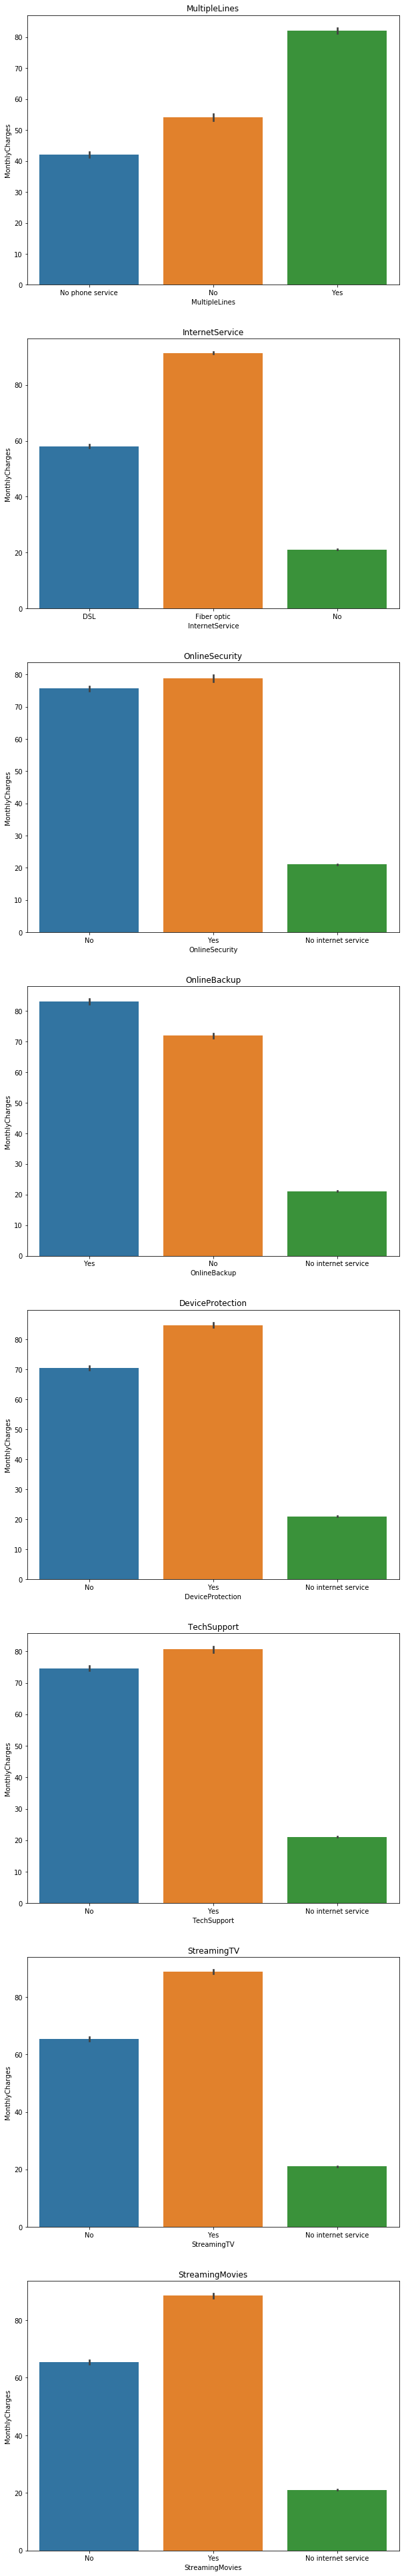

In [70]:
fig, ax = plt.subplots(nrows=len(services), figsize=(10,70))
for i, service in enumerate(services):
    # aggregate the Monthly charges based on service #
    agg = dt[[service,'MonthlyCharges']].groupby(by=[service]).median().reset_index()
    # visualization # 
    sns.barplot(x=service,y='MonthlyCharges',data=dt,ax=ax[i])
    ax[i].set_title(service)
    

- Will old customer churn when monthly charges are high regardless of the services

In [71]:
services_dt['tenure_bucket'] = pd.cut(services_dt['tenure'],[1,29,55,100],labels=['New','mid-new','old'])

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


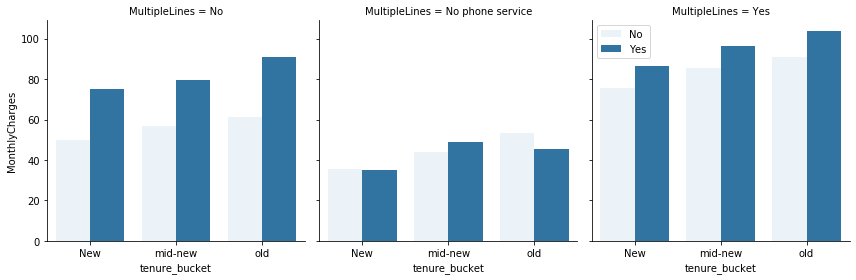

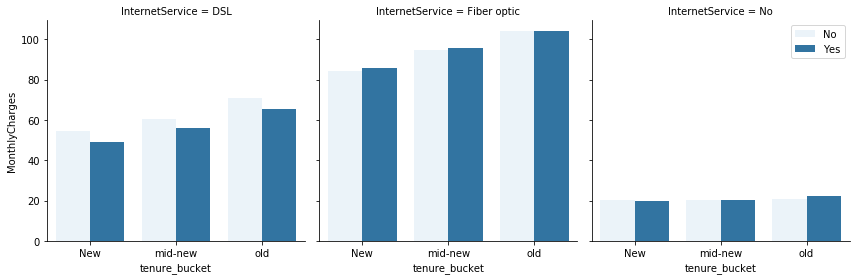

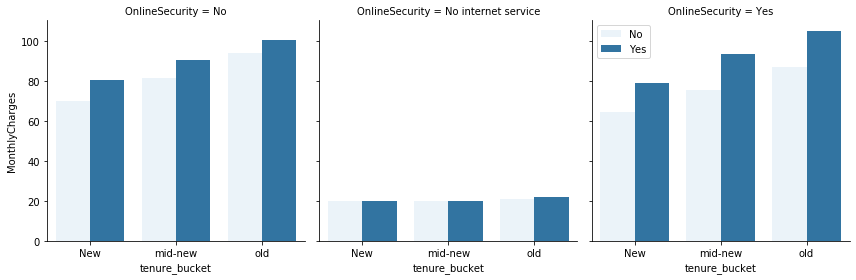

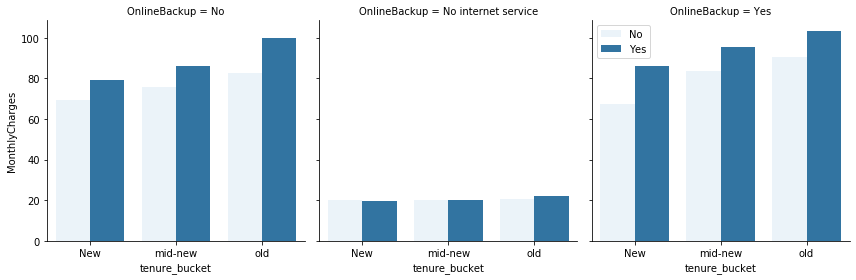

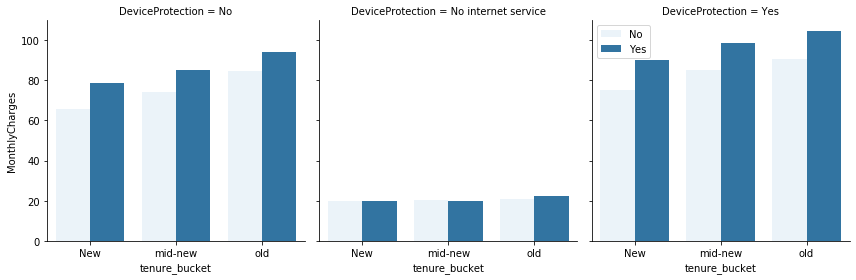

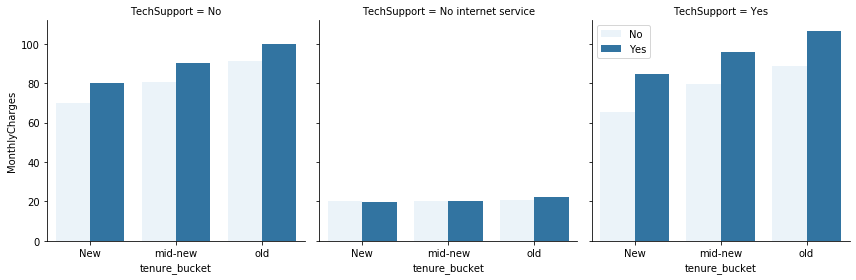

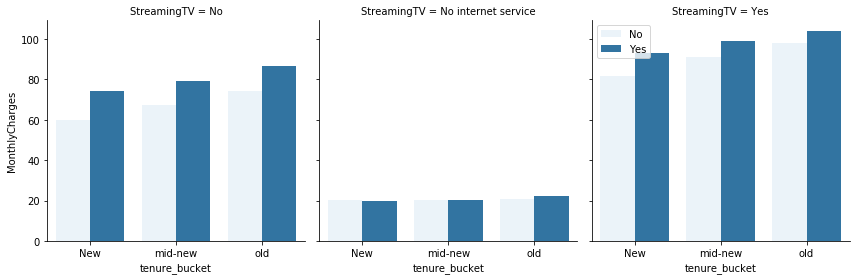

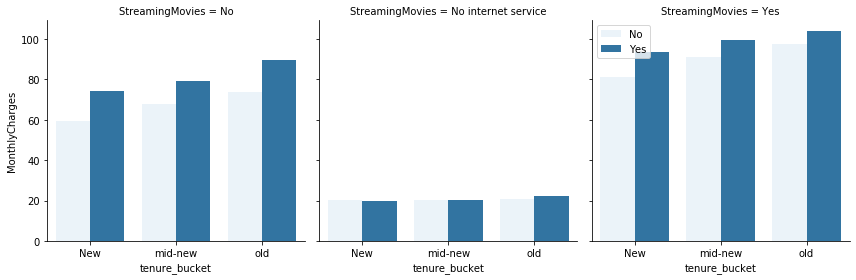

In [72]:
for service in services:
    agg = services_dt[[service,'MonthlyCharges','tenure_bucket','Churn']].groupby(by=[service,'tenure_bucket','Churn']).median().reset_index()
    g = sns.FacetGrid(agg,col=service,height=4)
    g = g.map(sns.barplot, "tenure_bucket",'MonthlyCharges','Churn')
    plt.legend()

__Conclusions__:
- Tenure has no significance over churn when it comes to fiber optics. people will or will not leave but long tenure doesn't matter.
- It doesn't seem like various services have any influence which could stop people from churn when the monthly charges are high. multiple lines with no phone service is only place where more clients opted to stay than to churn when the monthly charges where goes high.
- This chart also verify our previous assumptions that as the tenure increase monthly charges also increases and people churn regardless of services or tenure if the charges are high. 

2. Is there any difference between clients who are using parital services and clients who are using all services ?

- Do customers who are using all the services also churn? If yes how their churn rate is different from the users who are using partial services?  
- Is there any signifcant difference in monthly charges between these two groups?  
- Do Senior citizens churn even if they are the all services group ?

In [73]:
# remove extra columns #
only_services = services_dt[services_dt.columns[0:len(services_dt.columns)-4]]

In [74]:
# remove internet services # 
only_services.drop(columns=['InternetService'],axis=1, inplace=True)

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
def all_services(row):
    if row[0] == 'Yes' and row[1]=='Yes' and row[2] == 'Yes' and row[3]=='Yes' and row[4] == 'Yes' and row[5]=='Yes' and row[6] == 'Yes' and row[7]=='Yes':
        return 1
    else:
        return 0

In [76]:
services_dt['All services flag'] = only_services.apply(lambda x: all_services(x),axis=1)

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
users_wd_full_services = services_dt[services_dt['All services flag']==1]
users_wd_partial_services = services_dt[services_dt['All services flag']==0]

- Do customers who are using all the services also churn? If yes how their churn rate is different from the users who are using partial services?  

In [78]:
round((users_wd_full_services.Churn.value_counts()/len(users_wd_full_services))*100)

No     95.0
Yes     5.0
Name: Churn, dtype: float64

In [79]:
round((users_wd_partial_services.Churn.value_counts()/len(users_wd_partial_services))*100)

No     73.0
Yes    27.0
Name: Churn, dtype: float64

__Observations__:
1. The churn rate significantly decline in cases where clients are using all the services compared to partial services users. 
2. All services flag can be used in feature creation and model. 
3. Even in case of all services user what was the cause of churn? Is it abnormal monthly charges? 

- Is there any signifcant difference in monthly charges between these two groups?  

In [80]:
services_dt.groupby(by=['All services flag'])['MonthlyCharges'].median()

All services flag
0     69.800
1    113.325
Name: MonthlyCharges, dtype: float64

__Comments__:
1. There is a huge difference between their average monthly charges. It is almost double in case of all services users. 

In [81]:
agg = services_dt.groupby(by=['tenure','All services flag'])['MonthlyCharges'].median().reset_index()

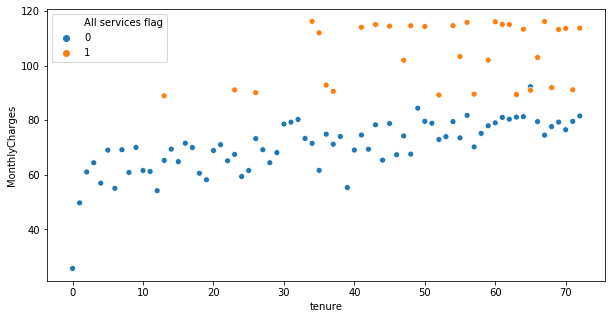

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='All services flag',data=agg)

- Is abnormally high monthly charges are the reasons of 5% churn in all services users group? 

In [83]:
agg = users_wd_full_services.groupby(by=['tenure','Churn'])['MonthlyCharges'].median().reset_index()

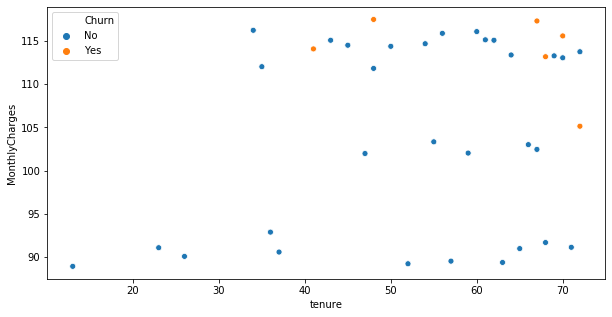

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn',data=agg)

In [85]:
subset_churn_only = users_wd_full_services[users_wd_full_services['Churn']=='Yes']

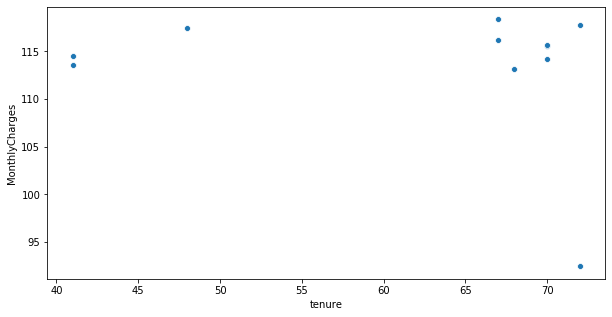

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='tenure',y='MonthlyCharges',data=subset_churn_only)

In [87]:
users_wd_full_services.groupby(by=['Churn'])['MonthlyCharges'].median()

Churn
No     113.15
Yes    115.55
Name: MonthlyCharges, dtype: float64

- Does Senior citizen churn even if they are the all services group ?

In [88]:
users_wd_full_services['SeniorCitizen'] = dt[dt.index.isin(users_wd_full_services.index)]['SeniorCitizen']

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
users_wd_full_services['SeniorCitizen']

15      0
28      0
140     1
167     0
256     0
       ..
6768    0
6859    0
6873    0
6910    0
6995    0
Name: SeniorCitizen, Length: 208, dtype: int64

In [90]:
users_wd_full_services.groupby(by=['SeniorCitizen','Churn'])['MonthlyCharges'].count()

SeniorCitizen  Churn
0              No       168
               Yes        9
1              No        29
               Yes        2
Name: MonthlyCharges, dtype: int64

__Conclusion:__
1. People who are all using all services don't usually churn as it can be seens that the percentage of churn shrink down from 27% to 5% in this case. 
2. Abnormally high monthly charges are likely the only reason of churn in the case of all services users. 
3. All services users have usually high monthly charges compared to partial services users. 
4. Senior citizens are only minimal in full service group and the churn rate is even lower (only 2 persons). 

3. What is the reason of churn for senior citizens if not high charges? 

In [91]:
senior_citizens.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1142.0,1142.000000,1142.000000
mean,1.0,33.295972,79.820359
std,0.0,24.188530,23.764027
min,1.0,1.000000,18.950000
25%,1.0,10.000000,70.150000
50%,1.0,31.000000,84.850000
75%,1.0,56.000000,98.075000
max,1.0,72.000000,117.450000


In [92]:
senior_citizens.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142
unique,1142,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1126,2
top,6917-YACBP,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.45,No
freq,1,574,573,1051,1038,665,831,808,614,624,830,572,595,807,876,594,2,666


Following could be the reason why senior citizens to churns. 
- Most of them were not provided technical support and usually in this age they can't troubleshoot things (if things don't work)
- Most of them have monthly based contract. Previously we have seen people most churn on monthly basis contract.
- They are mostly using electronic check which we have seen previously has high churn rate. 

- Most of them were not provided technical support and usually in this age they can't troubleshoot things (if things don't work)

Text(0.5, 1.0, 'Tech Support provided to Senior Citizens')

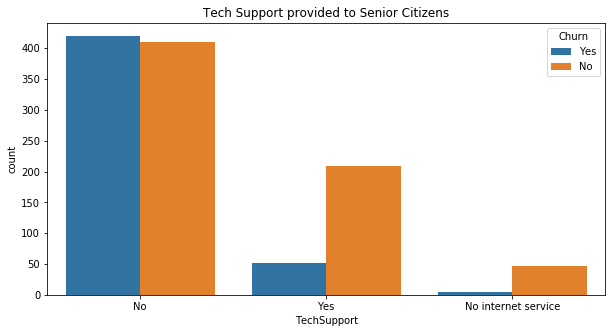

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(senior_citizens['TechSupport'], hue=senior_citizens['Churn'])
plt.title('Tech Support provided to Senior Citizens')

In [94]:
(senior_citizens.groupby(by=['TechSupport','Churn'])['customerID'].count()/len(senior_citizens))*100

TechSupport          Churn
No                   No       35.901926
                     Yes      36.777583
No internet service  No        4.115587
                     Yes       0.437828
Yes                  No       18.301226
                     Yes       4.465849
Name: customerID, dtype: float64

In [95]:
(senior_citizens.Churn.value_counts()/len(senior_citizens))*100

No     58.318739
Yes    41.681261
Name: Churn, dtype: float64

In [96]:
# overall percentage of churn due to no tech support # 
churn_due_techSupport = dt[(dt['TechSupport']=='No')]
round((churn_due_techSupport.groupby(by=['TechSupport','Churn'])['customerID'].count()/len(churn_due_techSupport))*100)

TechSupport  Churn
No           No       58.0
             Yes      42.0
Name: customerID, dtype: float64

__Observations__:
- Our assumption was correct because out 41%(which is total percentage of churn in senior citizen) 37% is in cases where technical support was not provided. 
- But it is important to note out of 58% (which is total percentage of non-churner in senior citizen) 36% comes from the group which was not provided technical support. Which is why the upper evidence appear to be a bit weak. 

- Most of them have monthly based contract. Previously we have seen people most churn on monthly basis contract.

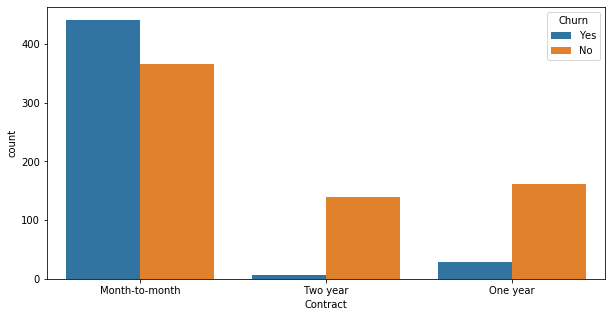

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(senior_citizens['Contract'],hue=senior_citizens['Churn'])

- Whether they took technical support in each of the contract type and what is its impact on contract? 

In [98]:
agg = senior_citizens.groupby(by=['TechSupport','Contract'])['customerID'].count().reset_index().rename(columns={'customerID':'counts'})

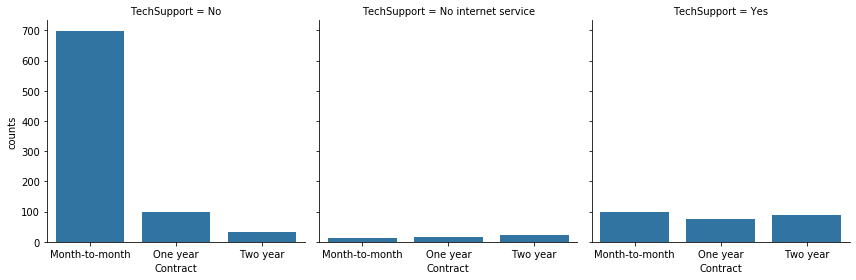

In [99]:
g = sns.FacetGrid(agg, col='TechSupport',height=4)
g.map(sns.barplot,'Contract','counts')

__Observations__:
1. Most of the senior citizen churn in month-to-month contract whereas, in case of large contract the number of non-churner was higher than churners. 
2. Most of the month-to-month contract had no tech support. 

- They are mostly using electronic check which we have seen previously has high churn rate. 

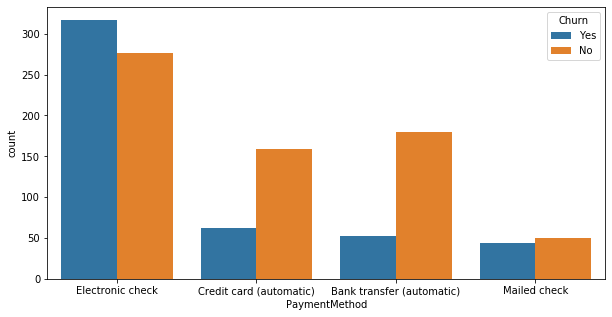

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(senior_citizens['PaymentMethod'],hue=senior_citizens['Churn'])

In [101]:
agg = senior_citizens.groupby(by=['TechSupport','Contract','PaymentMethod'])['customerID'].count().reset_index().rename(columns={'customerID':'counts'})

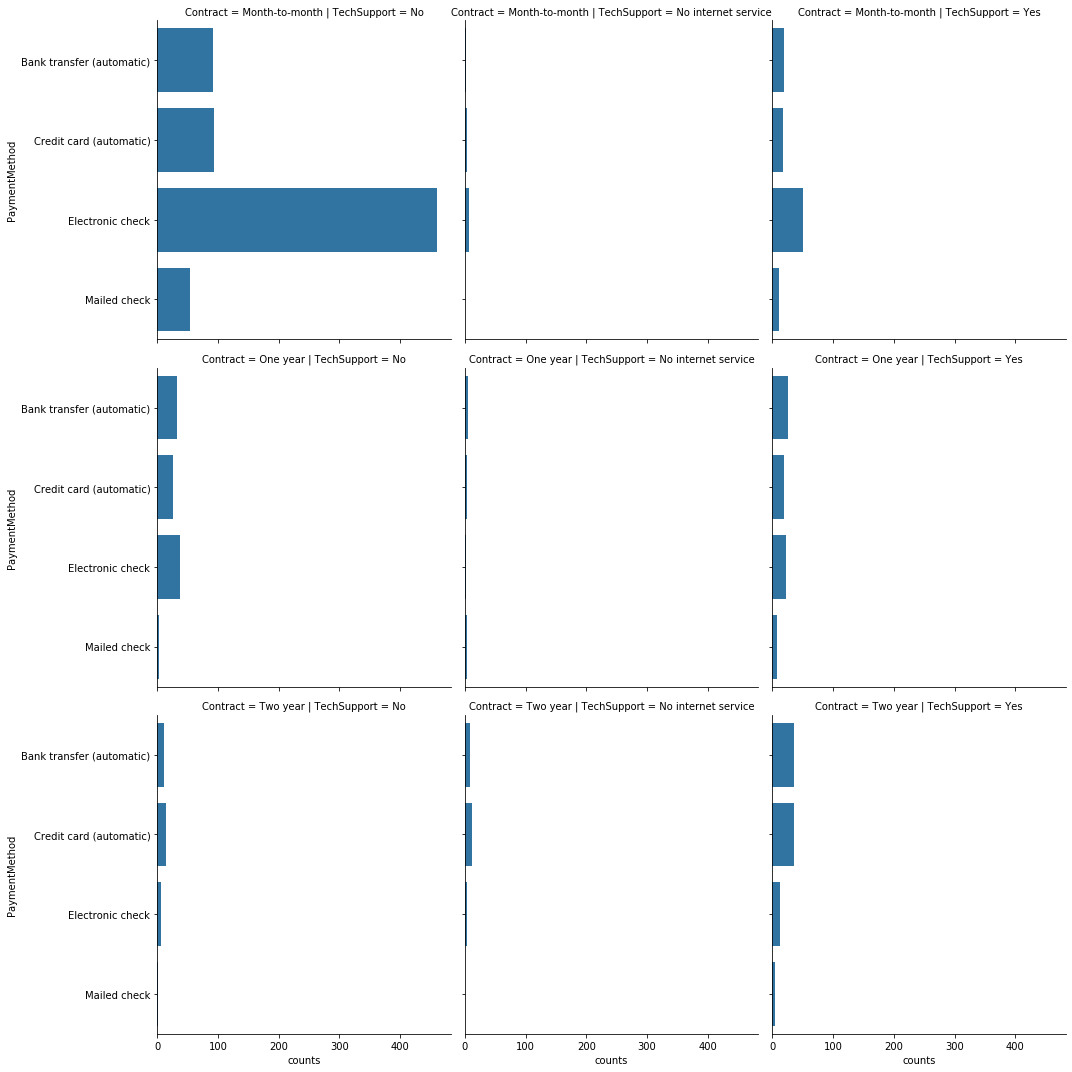

In [102]:
g = sns.FacetGrid(agg, col='TechSupport',row='Contract',height=5)
g.map(sns.barplot,'counts','PaymentMethod')

__Conclustions__:
1. It is interesting that electronic check, month-to-month contract type and no tech support are individually biggest sources of churn and yet in senior citizens cases these factors have significant percentage which make it diffcult to infer the actual cause of churning in senior citizens group. 

4. Maybe bad tech support or online security behind the fiber optics based churning? 
    - How many people receive technical support on optical fiber? 
    - How many people are using other services such as online security etc on optical fiber? 
   

- How many people receive technical support on optical fiber? 

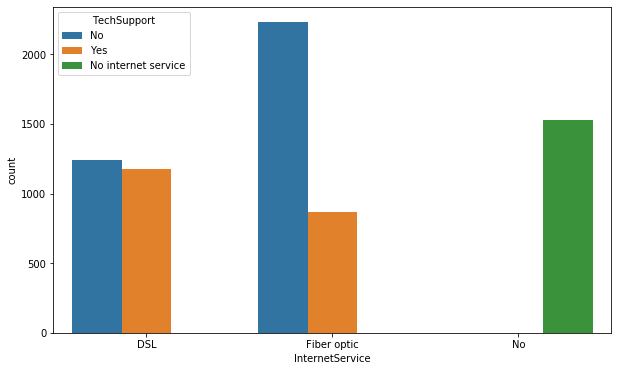

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(dt['InternetService'],hue=dt['TechSupport'])

In [156]:
(dt.groupby(by=['TechSupport','InternetService'])['customerID'].count()/len(dt))*100

TechSupport          InternetService
No                   DSL                17.648729
                     Fiber optic        31.662644
No internet service  No                 21.666903
Yes                  DSL                16.725827
                     Fiber optic        12.295897
Name: customerID, dtype: float64

In [178]:
(dt.InternetService.value_counts()/len(dt))*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

- What is the percentage of churn in DSL and Fiber Optic in cases where technical was or wasn't provided?
- What is the percentage of clients on fiber optics who got tech support compared to customers on DSL who got tech suport?

In [143]:
DSL_users = dt.loc[(dt['InternetService']=='DSL') & ((dt['TechSupport']=='Yes') | (dt['TechSupport']=='No')),['TechSupport','Churn','customerID']]
fbOptcs_users = dt.loc[(dt['InternetService']=='Fiber optic') & ((dt['TechSupport']=='Yes') | (dt['TechSupport']=='No')),['TechSupport','Churn','customerID']]

In [144]:
(DSL_users.groupby(by=['TechSupport','Churn']).count()/len(DSL_users))*100

customerID
TechSupport Churn            
No          No      37.092111
            Yes     14.250310
Yes         No      43.948781
            Yes      4.708798

In [145]:
(fbOptcs_users.groupby(by=['TechSupport','Churn']).count()/len(fbOptcs_users))*100

customerID
TechSupport Churn            
No          No      36.466408
            Yes     35.562016
Yes         No      21.640827
            Yes      6.330749

Tech Support percentage on DSL and Fiber optic

In [153]:
users_wd_tsuprt = dt.loc[((dt['InternetService']=='Fiber optic') | (dt['InternetService']=='DSL')) & (dt['TechSupport']=='Yes'),['InternetService','TechSupport','customerID']]

In [154]:
(users_wd_tsuprt.groupby(by=['InternetService','TechSupport']).count()/len(users_wd_tsuprt))*100

,,customerID
InternetService,TechSupport,
DSL,Yes,57.632094
Fiber optic,Yes,42.367906


- How many people are using other services such as online security etc on optical fiber?

In [165]:
services = services.drop('InternetService')

In [169]:
E_internetService = dt[dt['InternetService']!='No'] 

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


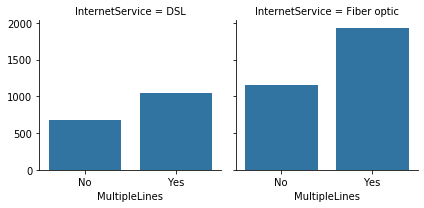

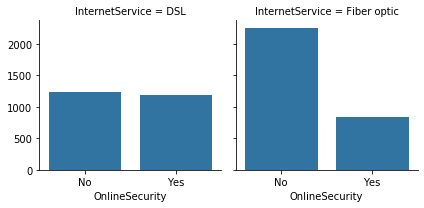

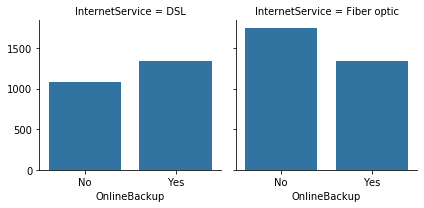

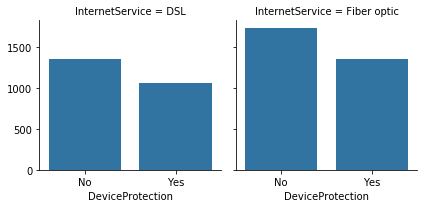

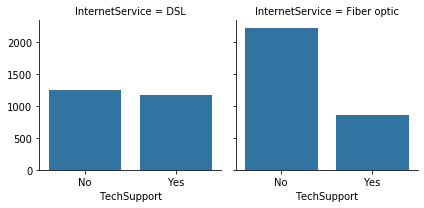

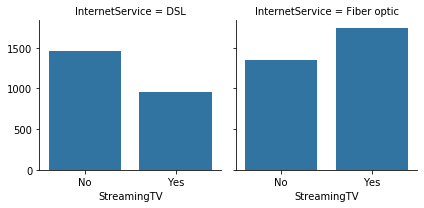

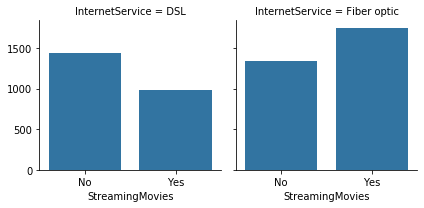

In [170]:
for i in services:
    g = sns.FacetGrid(E_internetService, col='InternetService')
    g = g.map(sns.countplot,i)

__Conclusion:__
- Out of total fiber optics (44% of the customer) about 32% weren't provided with technical support whereas this ratio is quite balanced in DSL where 17% percent out of 34% weren't provided with technical support. 
- People on fiber optics chose to have more streaming movies, streaming TV and multiple lines than not to have. 

5. Is there any different between charges of different contract types?

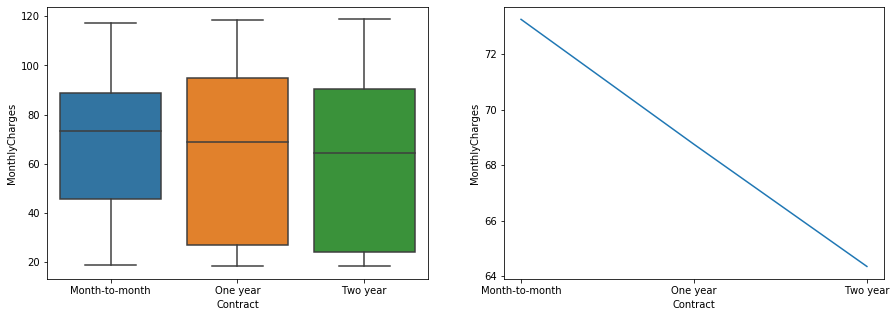

In [181]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
agg = dt.groupby(by=['Contract'])['MonthlyCharges'].median().reset_index()
sns.boxplot(x='Contract',y='MonthlyCharges',data=dt, ax=ax[0])
sns.lineplot(x='Contract',y='MonthlyCharges',data=agg, ax=ax[1])

__Conclusion__:
- There is sharp decline in median amount of monthly charges when compared with different contract type which give a cue why people churn more on monthly basis. 

6. Are most customers who pay via electronic check belong to senior citizens class? or they are customer of fiber optics? or they all are customer who didn't get the tech support? or maybe they all are month-to-month basis contract (which means high monthly charges). If any these is true then it is not because of electronic payment that they churn but these above mentioned factor could be the reason. 


In [191]:
electronic_checks = dt.loc[dt['PaymentMethod']=='Electronic check']

How many are senior citizens? 

In [194]:
(electronic_checks.SeniorCitizen.value_counts()/len(electronic_checks))*100

0    74.883721
1    25.116279
Name: SeniorCitizen, dtype: float64

How many of these senior citizens have churned? 

In [196]:
(electronic_checks.groupby(by=['SeniorCitizen','Churn'])['customerID'].count()/len(electronic_checks))*100

SeniorCitizen  Churn
0              No       43.002114
               Yes      31.881607
1              No       11.712474
               Yes      13.403805
Name: customerID, dtype: float64

How many customers of fiber optic? 

In [198]:
(electronic_checks.InternetService.value_counts()/len(electronic_checks))*100

Fiber optic    67.441860
DSL            27.399577
No              5.158562
Name: InternetService, dtype: float64

How many of these fiber optic users have churned? 

In [199]:
(electronic_checks.groupby(by=['InternetService','Churn'])['customerID'].count()/len(electronic_checks))*100

InternetService  Churn
DSL              No       18.646934
                 Yes       8.752643
Fiber optic      No       31.543340
                 Yes      35.898520
No               No        4.524313
                 Yes       0.634249
Name: customerID, dtype: float64

How many got the technical support? 

In [200]:
(electronic_checks.TechSupport.value_counts()/len(electronic_checks))*100

No                     73.150106
Yes                    21.691332
No internet service     5.158562
Name: TechSupport, dtype: float64

How many of these users have churned who got technical support? 

In [201]:
(electronic_checks.groupby(by=['TechSupport','Churn'])['customerID'].count()/len(electronic_checks))*100

TechSupport          Churn
No                   No       34.249471
                     Yes      38.900634
No internet service  No        4.524313
                     Yes       0.634249
Yes                  No       15.940803
                     Yes       5.750529
Name: customerID, dtype: float64

How many on monthly basis? 

In [202]:
(electronic_checks.Contract.value_counts()/len(electronic_checks))*100

Month-to-month    78.224101
One year          14.672304
Two year           7.103594
Name: Contract, dtype: float64

How many of these users have churned who got technical support? 

In [203]:
(electronic_checks.groupby(by=['Contract','Churn'])['customerID'].count()/len(electronic_checks))*100

Contract        Churn
Month-to-month  No       36.194503
                Yes      42.029598
One year        No       11.966173
                Yes       2.706131
Two year        No        6.553911
                Yes       0.549683
Name: customerID, dtype: float64

What is the average monthly charges on electronic check payment compared to other payment methods? 

In [205]:
dt.groupby(by=['Contract'])['MonthlyCharges'].median()

Contract
Month-to-month    73.25
One year          68.75
Two year          64.35
Name: MonthlyCharges, dtype: float64

__Conclusions__:
1. So far we have noticed that electronic check has nothing to with the churn it is interest to see that it is due to monthly contract (high average monthly charges), senior citizens, fiber optics and no tech support that people often churn and their payment method is electronic check. 

7. What is Monthly charges tolerance of old and new customers? It there any difference in the level of tolerance between two groups of users? 

We are considering people who have tenure less than or equal to 3 months and onwards are old customers? 

In [213]:
dt['ON_C_flag'] = dt['tenure'].apply(lambda x: 'new' if x <=3 else 'old' )

In [224]:
agg = dt.groupby(by=['ON_C_flag','Churn'])['MonthlyCharges'].median().reset_index()

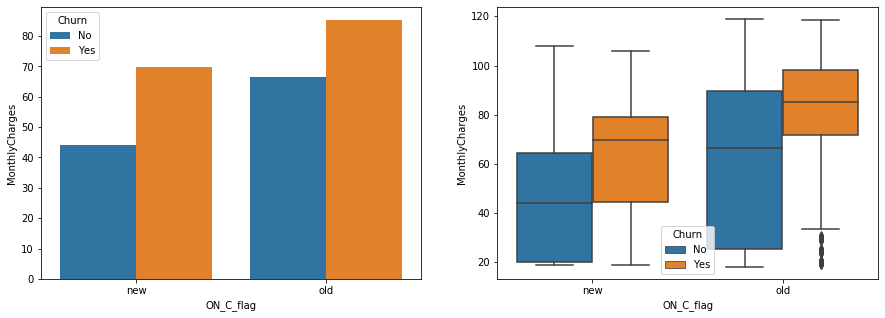

In [228]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
sns.barplot(x='ON_C_flag',y='MonthlyCharges',hue='Churn',data=agg,ci=False, ax=ax[0])
sns.boxplot(x='ON_C_flag',y='MonthlyCharges',hue='Churn',data=dt, ax=ax[1])

In [221]:
agg = dt.groupby(by=['ON_C_flag'])['MonthlyCharges'].median().reset_index()

In [222]:
agg

,ON_C_flag,MonthlyCharges
0,new,51.25
1,old,74.00


__conclusions__:
1. There is a significant difference in median amount of monthly charges when compared between old and new customers which indicate tenure has a lot to say about churn. Because if a customer is new they can churn if their average monthly charges goes to 60 but old customer usually doesn't churn there. 

8. Those who have partner (yes) how their monthly charges vary? 

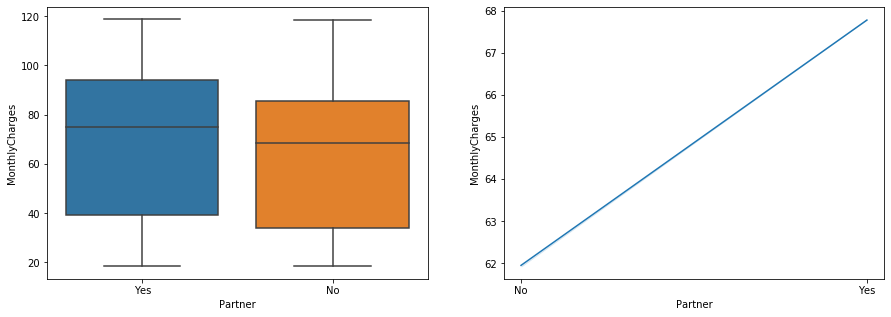

In [210]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
agg = dt.groupby(by=['Partner'])['MonthlyCharges'].median().reset_index()
sns.boxplot(x='Partner',y='MonthlyCharges',data=dt,ax = ax[0])
sns.lineplot(x='Partner',y='MonthlyCharges',ci=False, data=dt,ax=ax[1])

__conclusions__:
1. Those who have partner or taken service from partner (because I am not certain what it represent) have a slightly higher monthly charges compared to those who have not taken it from partner or don't have partner. 

## Further Questions

1. What kinds of services led to increase in monthly charges? 
2. What are the chances of new customer churn (tenure ==0-2)? 
3. Can dependents really impact the churn?
4. Having multiplelines on optical fiber can impact the churn rate there?
5. In cases where support wasn't provided for DSL customer how they reacted to that? Did they churn? 

In [103]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_buckets', 'monthly_charges_bucket'],
      dtype='object')